***Visualizing the Effect of Training Set Size***

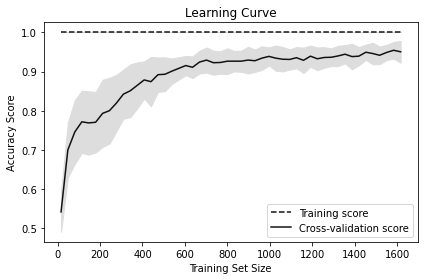

In [2]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(# Classifier
  RandomForestClassifier(),
  # Feature matrix
  features,
  # Target vector
  target,
  # Number of folds
  cv=10,
  # Performance metric
  scoring='accuracy',
  # Use all computer cores
  n_jobs=-1,
  # Sizes of 50
  # training set
  train_sizes=np.linspace(
  0.01,
  1.0,
  50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

***Visualizing the Effect of Hyperparameter Values***

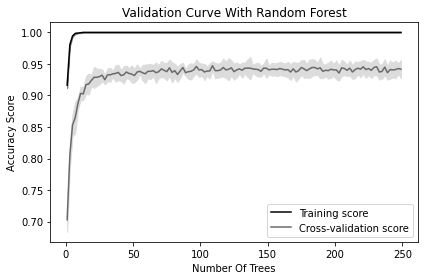

In [3]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target
# Create range of values for parameter
param_range = np.arange(1, 250, 2)
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
  # Classifier
  RandomForestClassifier(),
  # Feature matrix
  features,
  # Target vector
  target,
  # Hyperparameter to examine
  param_name="n_estimators",
  # Range of hyperparameter's values
  param_range=param_range,
  # Number of folds
  cv=3,
  # Performance metric
  scoring="accuracy",
  # Use all computer cores
  n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
test_mean + test_std, color="gainsboro")
# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()